Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Loading the dataset

In [2]:
df = pd.read_csv("insurance.csv")

Data Cleaning 

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
# checking the missing values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# there is nothing missing values,
# so let's check the duplicates 
df.duplicated().sum()

np.int64(1)

In [8]:
# as we can see there is duplicates, let's see the duplicates 
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
# let's drop the duplicates
df.drop_duplicates(inplace=True)
# checking the duplicates again
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(1337, 7)

In [11]:
# let's check columns 
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
# checking inconsistent labels
columns_for_check = df.select_dtypes(include=['object']).columns

for column in columns_for_check:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in sex: ['female' 'male']
Unique values in smoker: ['yes' 'no']
Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']


In [13]:
# checking outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"\nOutliers in {col}:")
    print(outliers)


Outliers in age:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

Outliers in bmi:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270

Outliers in children:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

Outliers in charges:
      age     sex     bmi  children smoker     region      charges
14     27    male  4

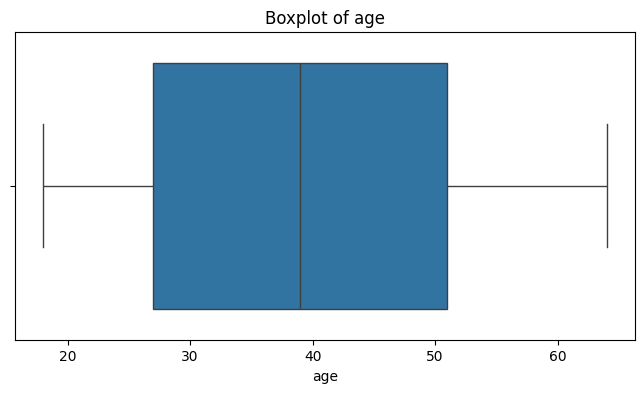

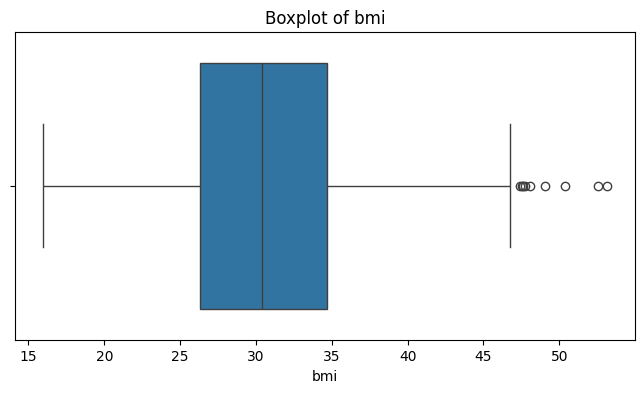

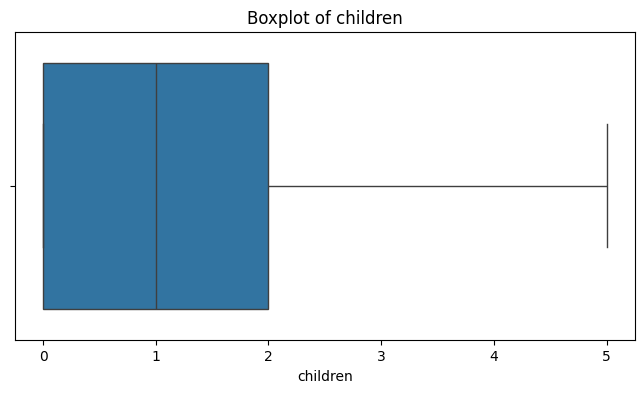

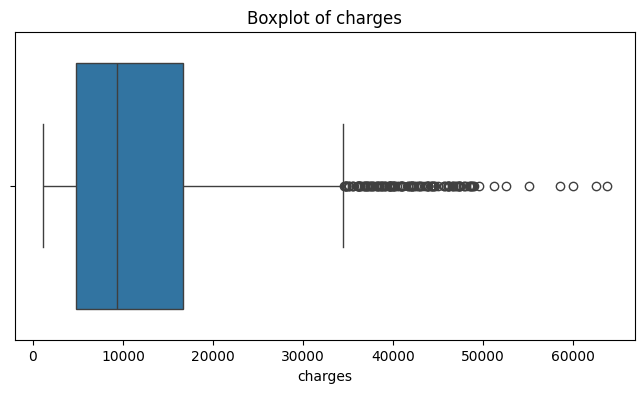

In [14]:
# let's visualize the outliers
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Explory data analysis 

In [15]:
# statistical summary
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df.describe(include='object')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


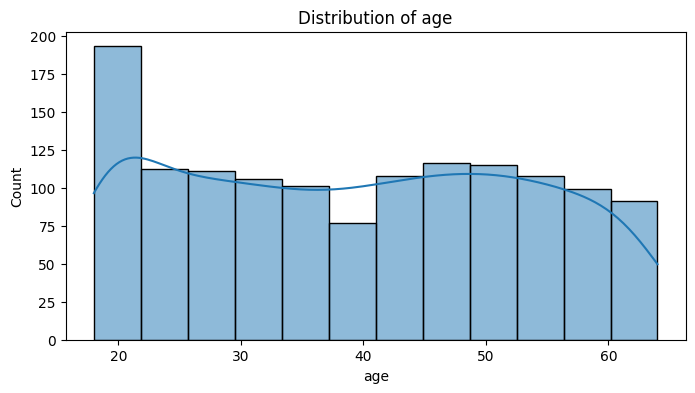

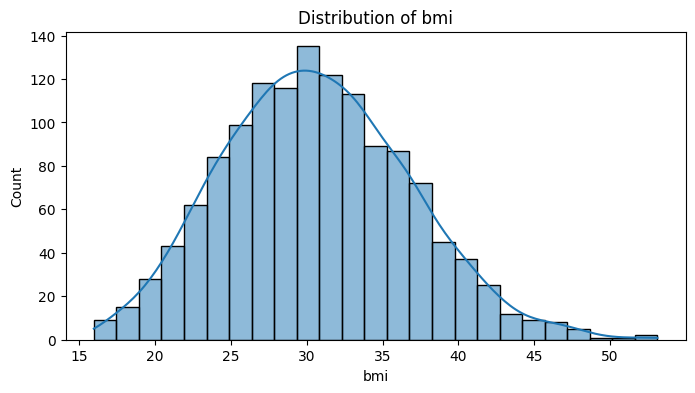

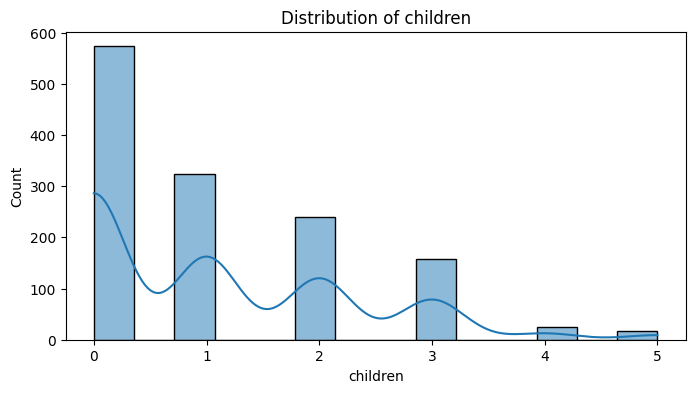

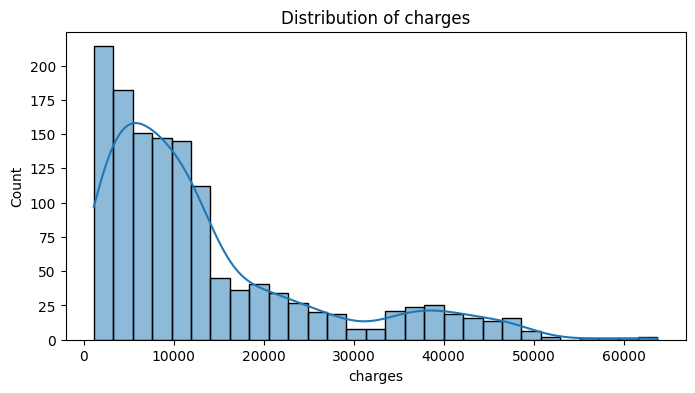

In [17]:
# let's check the distribution values 
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

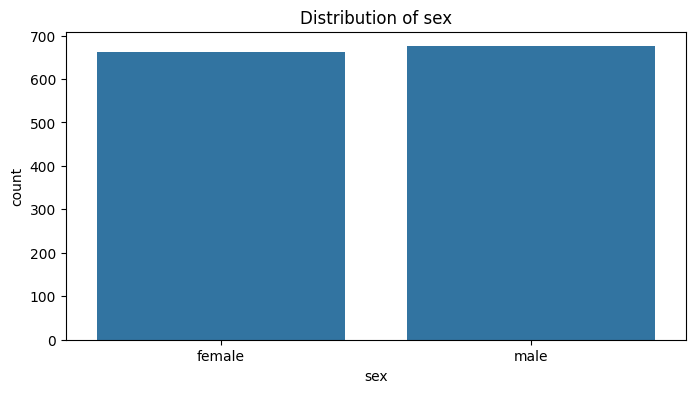

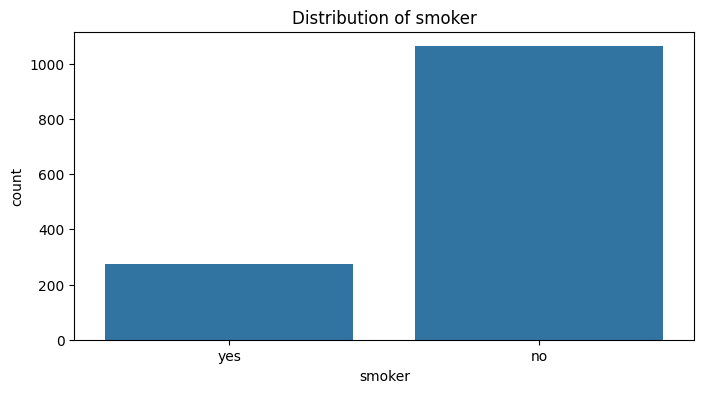

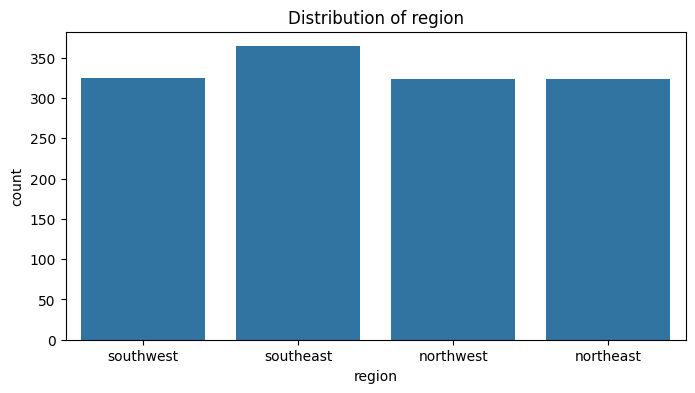

In [18]:
# let's check the distribution of categorical values
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


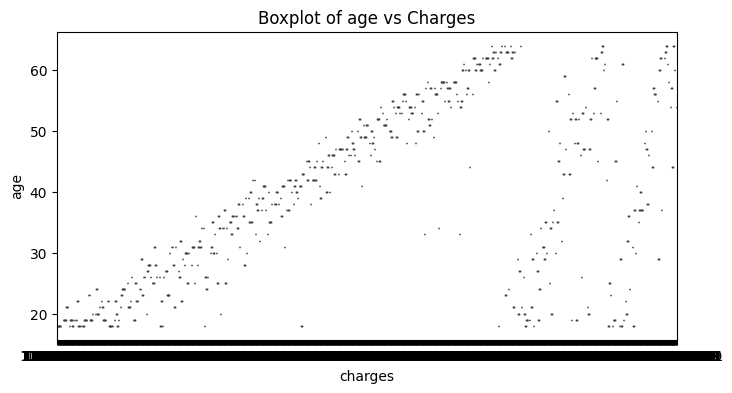

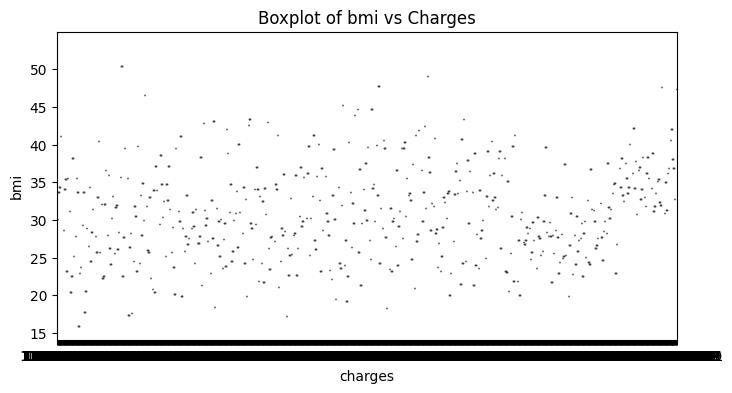

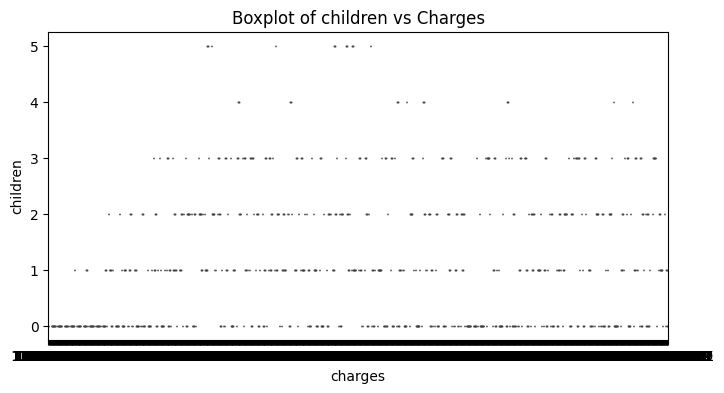

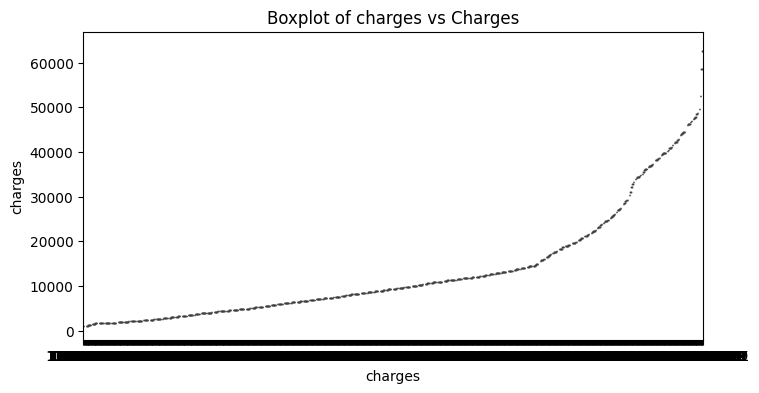

In [19]:
# boxplot for numerical features against the target variable
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['charges'], y=df[col])
    plt.title(f'Boxplot of {col} vs Charges')
    plt.show()

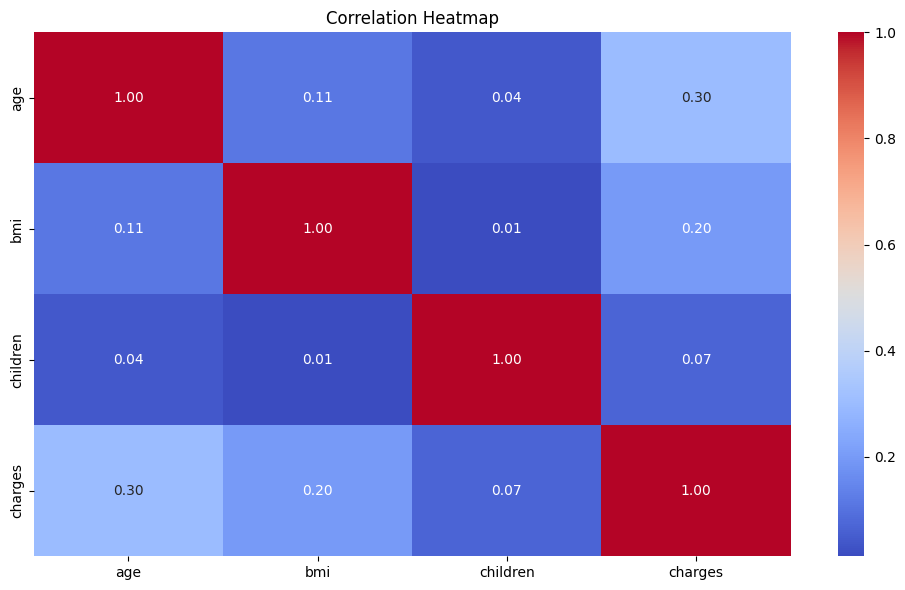

In [20]:
# let's check the correlation between the numercial features
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


Feature Engineering 

In [21]:
# encode categorical variables
df.replace({'sex': {'male': 0, 'female': 1},
           'smoker': {'no': 0, 'yes': 1},
           'region': {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_46996\352017100.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex': {'male': 0, 'female': 1},


In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


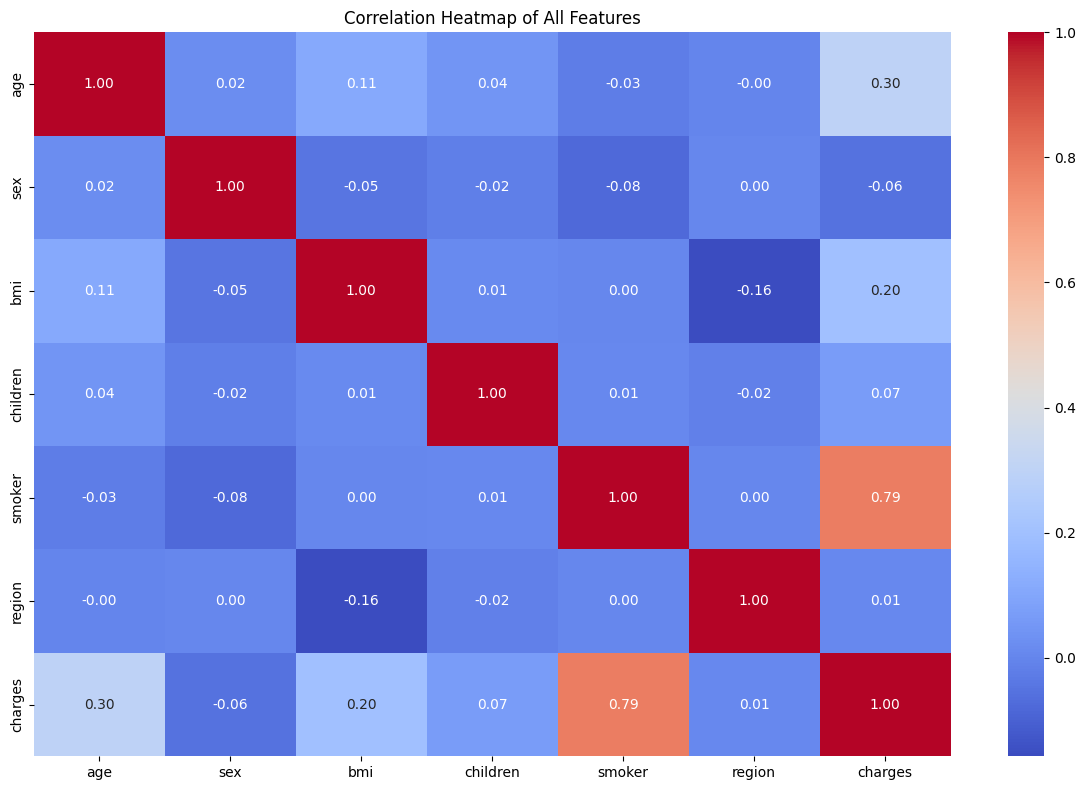

In [23]:
# let's check the correlation between the all features
plt.figure(figsize=(12, 8))
corr_all = df.corr()
sns.heatmap(corr_all, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Features')
plt.tight_layout()
plt.show()

Data Preprocessing

Split Data into Training and Testing 

In [35]:
x = df.drop('charges', axis=1)
y = df['charges']

# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
print(f"Train set shape: {x_train.shape}, Test set shape: {x_test.shape}")

Train set shape: (1069, 6), Test set shape: (268, 6)


Train the Linear Regression Model

In [37]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [38]:
training_predictions = model.predict(x_train)

r2_train = r2_score(y_train, training_predictions)
mse_train = mean_squared_error(y_train, training_predictions)
rmse_train = np.sqrt(mse_train)

print(f"Training R^2: {r2_train:.2f}")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Training MSE: {mse_train:.2f}")

Training R^2: 0.73
Training RMSE: 6083.22
Training MSE: 37005531.73


In [39]:
# for better understand let's get RMSE and MSE in percentage
mean_train = y_train.mean()

rmse_percent = (rmse_train / mean_train) * 100
mse_percent = (mse_train / (mean_train ** 2)) * 100

print(f"Training RMSE as percentage of mean charges: {rmse_percent:.2f}%")
print(f"Training MSE as percentage of squared mean charges: {mse_percent:.2f}%")

Training RMSE as percentage of mean charges: 46.69%
Training MSE as percentage of squared mean charges: 21.80%


In [40]:
testing_predictions = model.predict(x_test)

r2_test = r2_score(y_test, testing_predictions)
mse_test = mean_squared_error(y_test, testing_predictions)
rmse_test = np.sqrt(mse_test)

print(f"Testing R^2: {r2_test:.2f}")
print(f"Testing MSE: {mse_test:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")

Testing R^2: 0.81
Testing MSE: 35493102.61
Testing RMSE: 5957.61


In [41]:
# for better understand let's get RMSE and MSE in percentage
mean_test = y_test.mean()

rmse_test_percent = (rmse_test / mean_test) * 100
mse_test_percent = (mse_test / (mean_test ** 2)) * 100
print(f"Testing RMSE as percentage of mean charges: {rmse_test_percent:.2f}%")
print(f"Testing MSE as percentage of squared mean charges: {mse_test_percent:.2f}%")

Testing RMSE as percentage of mean charges: 41.74%
Testing MSE as percentage of squared mean charges: 17.43%


Building a predictive system 

In [42]:
new_data = pd.DataFrame({
    'age': [27, 19, 52],
    'sex': ['male', 'male', 'female'],
    'bmi': [42.13, 24.6, 30.78],
    'children': [0, 1, 1],
    'smoker': ['yes', 'no', 'no'],
    'region': ['southeast', 'southwest', 'northeast']
})

In [43]:
new_data.replace({
    'sex': {'male': 0, 'female': 1},
    'smoker': {'no': 0, 'yes': 1},
    'region': {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
}, inplace=True)


predicted_charges = model.predict(new_data)

# Show the predictions
for i, charge in enumerate(predicted_charges):
    print(f"Predicted charges for sample {i+1}: {charge:.2f}")

Predicted charges for sample 1: 31316.37
Predicted charges for sample 2: 1090.56
Predicted charges for sample 3: 12044.27


C:\Users\user\AppData\Local\Temp\ipykernel_46996\2474050717.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data.replace({


In [44]:
actual_charges = [39611.76, 1837.237, 10797.34]
for i, (pred, actual) in enumerate(zip(predicted_charges, actual_charges)):
    print(f"Sample {i+1}: Predicted = {pred:.2f}, Actual = {actual}")

Sample 1: Predicted = 31316.37, Actual = 39611.76
Sample 2: Predicted = 1090.56, Actual = 1837.237
Sample 3: Predicted = 12044.27, Actual = 10797.34
